In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

from scipy.integrate import odeint

In [2]:
def single_pendulum(y, t, m, l, g, kf):
    x1, x2 = y

    dxdt = [x2,
            -g/l*np.sin(x1) - kf/m*x2]

    return dxdt

In [6]:
# Parameters of the system
m = 0.5 # mass of the ball [Kg]
g = 9.81 # gravity [m/s²]
l = 0.30 # long [m]
kf = 0.0 # friction coefficient

# Initial conditions
y0 = [np.pi/4, 0.0]

# Parameters of simulation
h = 1e-3
tfin = 1
N = np.int64(np.ceil((tfin-h)/h))
t = h + np.arange(0,N)*h

In [7]:
sol = odeint(single_pendulum, y0, t, args=(m, l, g, kf))

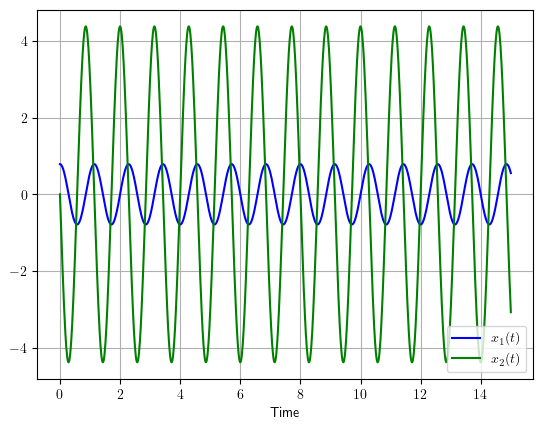

In [8]:
plt.plot(t, sol[:, 0], 'b', label = r'$x_1(t)$')
plt.plot(t, sol[:, 1], 'g', label = r'$x_2(t)$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.grid()
plt.show()

In [11]:
x1 = sol[:, 0]
x2 = sol[:, 1]

xpp = -g/l*np.sin(x1) - kf/m*x2
xpp.shape

(1000,)

In [12]:
h = t[1] - t[0]

xpp_num = np.diff(np.diff(x1)/h)/h

xpp_num.shape

(998,)

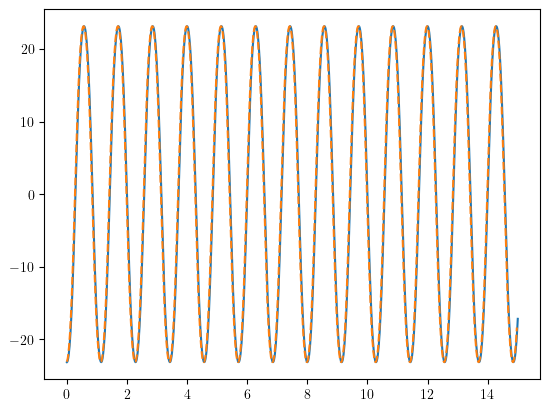

In [18]:
plt.figure
plt.plot(t, xpp)
plt.plot(t[:-2], xpp_num, '--')
plt.show()

In [19]:
def benchmark(y, yg):
    """
     This function computes several statistical criteria and index performance.

     Parameters
     ----------
     yg : Numpy array.
        Predicted data.
     y : Numpy array.
        Real data.

     Returns
     -------
     A dictionary.
    """

    def mse(y, yg):
        return np.mean((yg - y)**2)

    def rmse(y, yg):
        return np.sqrt(mse(y, yg))
        #return np.sqrt(np.mean((y - yg)**2))

    def mae(y, yg):
        return np.mean(np.abs(y - yg))

    def mape(y, yg):
        return 100*np.mean(np.abs((y - yg)/y))

    def fit(y, yg):
        return 100*(1 - np.linalg.norm(y - yg)/np.linalg.norm(y - np.mean(y)))

        

    results = {
        'MSE': mse(y, yg),
        'RMSE': rmse(y, yg),
        'MAE': mae(y, yg),
        'MAPE': mape(y, yg),
        'FIT': fit(y, yg)
    }

    return results
        


In [20]:
resultados = benchmark(xpp[:-2], xpp_num)
print(resultados)

{'MSE': 1.9347543385961772, 'RMSE': 1.3909544703534251, 'MAE': 1.2091812952213388, 'MAPE': 53.075802782331664, 'FIT': 91.77106825274576}
